# <span style="color:green">Lab random variables distribution | Ainara Guerra</span> 

<span style="color:rgb(255, 0, 255)">**💗Steps in pink have been practiced in previous labs in this Unit and they have been reviewed with feedback of the labs by the TAs and inspiration from the exercises of other students**

<span style="color:green"> **🟩To review only the exercise for this lab, jump into the green titles**

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### <span style="color:rgb(255, 0, 255)">--- Let's look at its main features (head, shape, info).

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [7]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### <span style="color:rgb(255, 0, 255)">--- Put the columns names on point

In [8]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
cols = [col_name.lower().replace(' ', '_') for col_name in data]
data.columns = cols
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### <span style="color:rgb(255, 0, 255)">--- Drop columns that we don't longer need

In [10]:
data = data.drop(['customer'], axis=1)
data.head() #we don't need customer for the model because is an ID

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

<span style="color:rgb(255, 0, 255)">Let's put this column in the correct format:

In [11]:
data["effective_to_date"] = pd.to_datetime(data["effective_to_date"], errors='coerce')

In [12]:
data["effective_to_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


<span style="color:rgb(255, 0, 255)">But also, let's create columns for year, month and day in case we need it:

In [49]:
data['year']=data['effective_to_date'].dt.year
data['month']=data['effective_to_date'].dt.month
data['week']=data['effective_to_date'].dt.week
data['day']=data['effective_to_date'].dt.day
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,week,day,year
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,8,24,2011
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,5,31,2011
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,7,19,2011
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,3,20,2011
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,5,3,2011


In [50]:
# It is the same year, so let's drop that column:
data = data.drop(['year'], axis = 1)
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,week,day
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,8,24
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,5,31
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,7,19
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,3,20
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,5,3


### <span style="color:rgb(255, 0, 255)">--- Load the continuous and discrete variables into numericals and categorical variables</span>

In [35]:
num = data.select_dtypes(include = np.number)
num = num.drop('total_claim_amount', axis=1) # we don't want the target of the model in the num table.
cat = data.select_dtypes(include = np.object)

# Let's create two tables withe target and date, not included in the previous tables of cat and num.
date = data["effective_to_date"]
target = data['total_claim_amount']

In [36]:
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,week,day
0,2763.519279,56274,69,32,5,0,1,2,8,24
1,6979.535903,0,94,13,42,0,8,1,5,31
2,12887.431650,48767,108,18,38,0,2,2,7,19
3,7645.861827,0,106,18,65,0,7,1,3,20
4,2813.692575,43836,73,12,44,0,1,2,5,3


In [37]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
target.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [39]:
date.head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

***

# <span style="color:green"> Instructions </span> 

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### <span style="color:green"> 1. Get the numerical variables from our dataset.

In [48]:
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,week,day
0,2763.519279,56274,69,32,5,0,1,2,8,24
1,6979.535903,0,94,13,42,0,8,1,5,31
2,12887.431650,48767,108,18,38,0,2,2,7,19
3,7645.861827,0,106,18,65,0,7,1,3,20
4,2813.692575,43836,73,12,44,0,1,2,5,3


In [51]:
num.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
month                               2
week                               10
day                                31
dtype: int64

<span style="color:green"> Let's see how this is distributed:
- Continous: customer_lifetime_value, income, monthly_premium_auto, months_since_last_claim, months_since_policy_inception
- Discrete: number_of_open_complaints, number_of_policies, month, week, day

In [54]:
num_cont = data[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception']]
num_disc = data[['number_of_open_complaints', 'number_of_policies', 'month', 'week', 'day']]

In [55]:
num_cont.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274,69,32,5
1,6979.535903,0,94,13,42
2,12887.431650,48767,108,18,38
3,7645.861827,0,106,18,65
4,2813.692575,43836,73,12,44


In [56]:
num_disc.head()

,number_of_open_complaints,number_of_policies,month,week,day
0,0,1,2,8,24
1,0,8,1,5,31
2,0,2,2,7,19
3,0,7,1,3,20
4,0,1,2,5,3


### <span style="color:green">2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


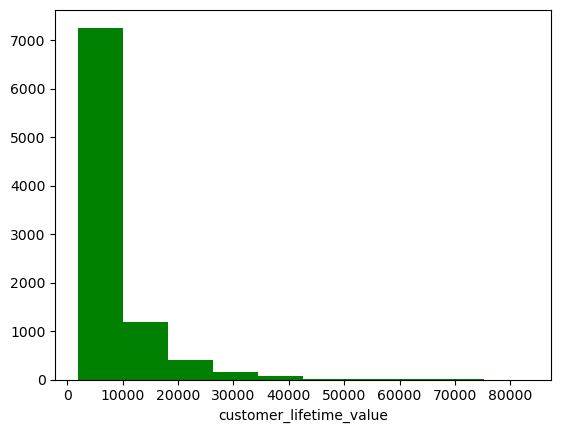

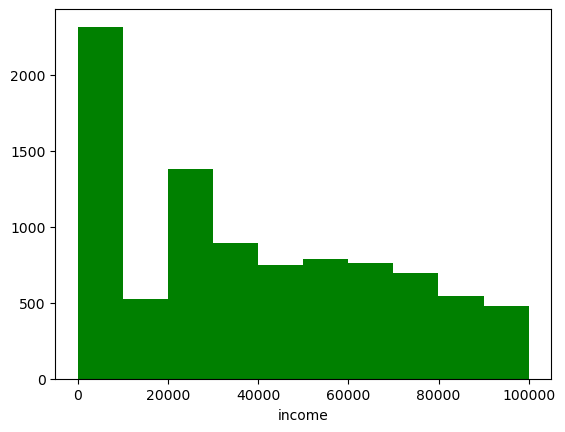

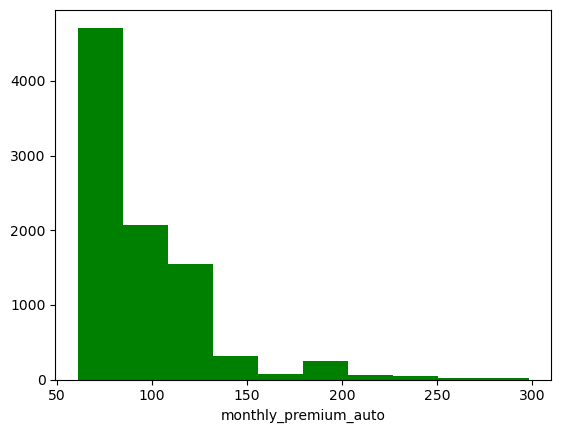

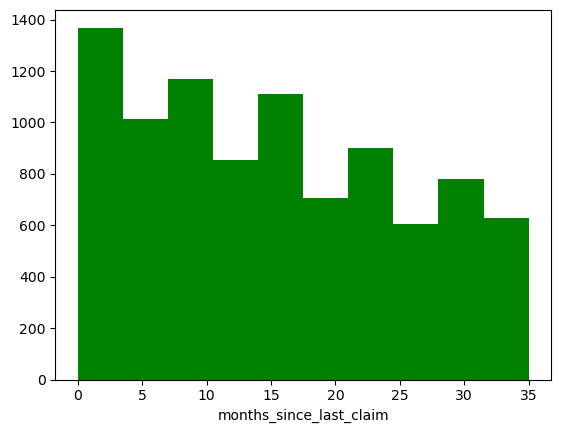

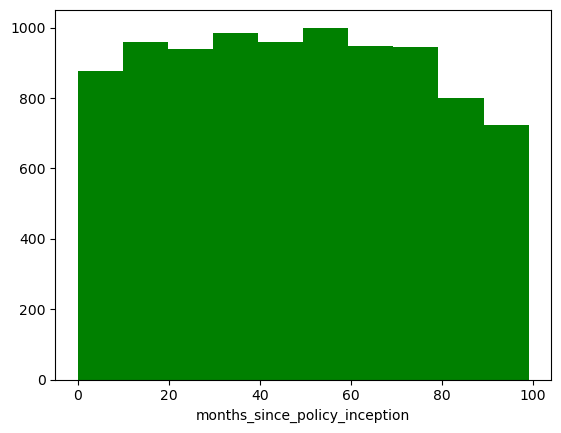

In [57]:
for column in num_cont.columns:
    plt.hist(num_cont[column],color="green")
    plt.xlabel(column) #Change x Label
    plt.show()

 <span style="color:green"> How do I see each **distribution**:
    
Continous: 
- **customer_lifetime_value** = exponential distribution
- **Income** = *Kind of* normal distribution
- **monthly_premium_auto** = exponential distribution
- **monthly_since_last_claim** = *Kind of* exponential distribution
- **monthly_since_last_incepction** = *Kind of* uniform distribution

### <span style="color:green"> 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

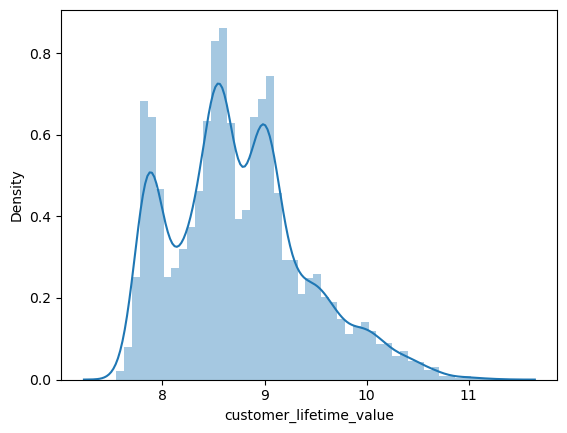

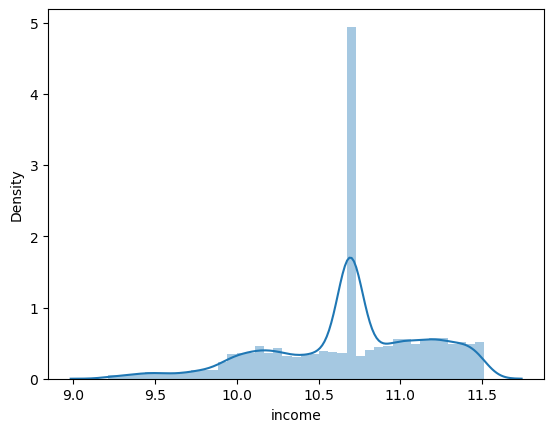

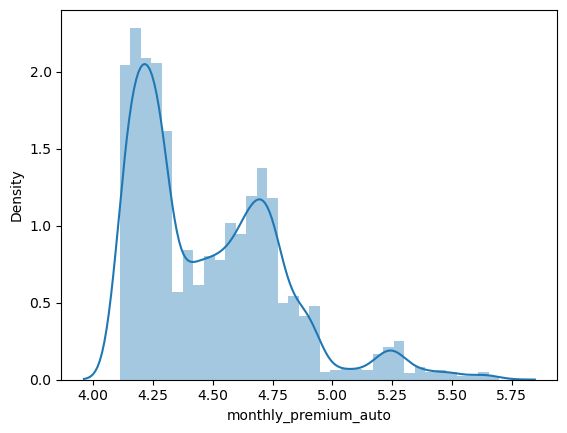

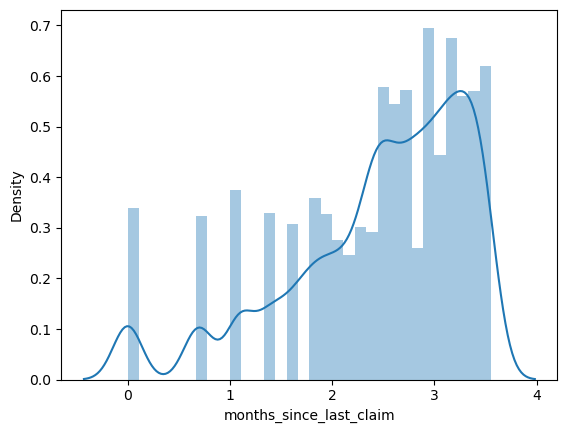

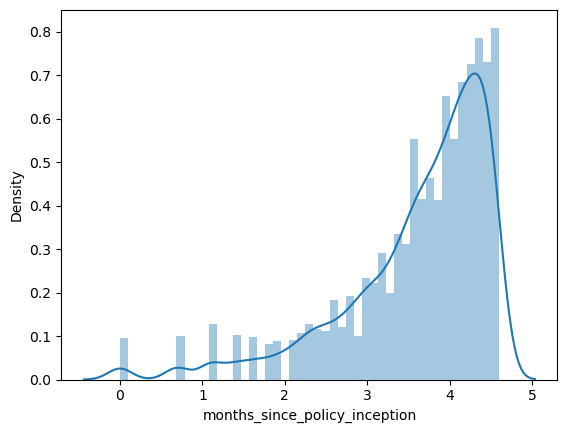

In [60]:
# With Log Transformation
num_log=num_cont
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in num_log.columns:
    num_log[column] = list(map(log_transfom_clean, num_log[column])) #Transformation
    num_log[column] = num_log[column].fillna(np.mean(num_log[column]))    #Clean NAN
    
# Print the dristribution plots for the numerical values. 
for column in num_log.columns:
    sns.distplot(num_log[column])
    plt.show()

 <span style="color:green"> It kind of looks like **a normal distribution** in some cases:

- **customer_lifetime_value** = It gets near a normal distribution but doesn't look like one.
- **Income** = It doesn't look like a normal distribution
- **monthly_premium_auto** = It gets near a normal distribution but doesn't look like one.
- **monthly_since_last_claim** = It gets near a normal distribution but doesn't look like one.
- **monthly_since_last_incepction** = **It looks like negative skew normal distribution**

 <span style="color:green"> Let's try another way of normalizing them:


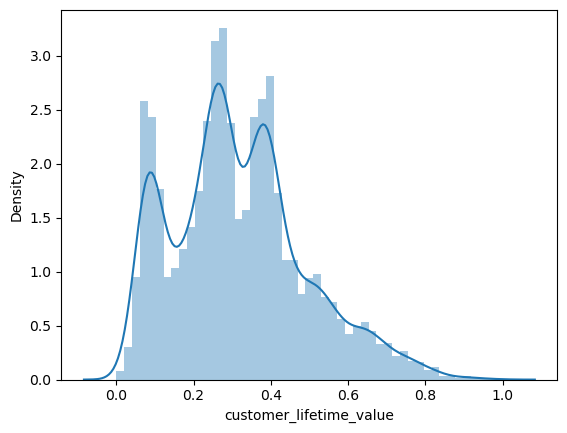

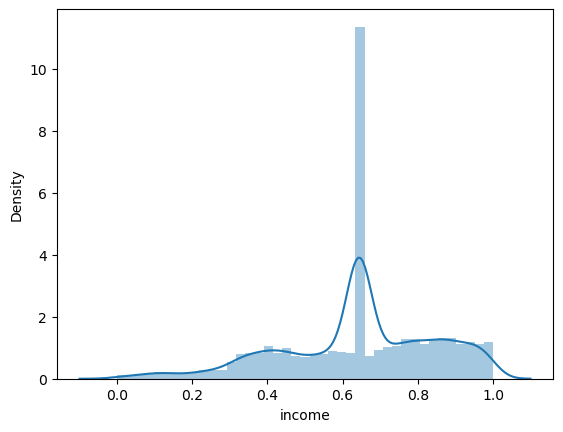

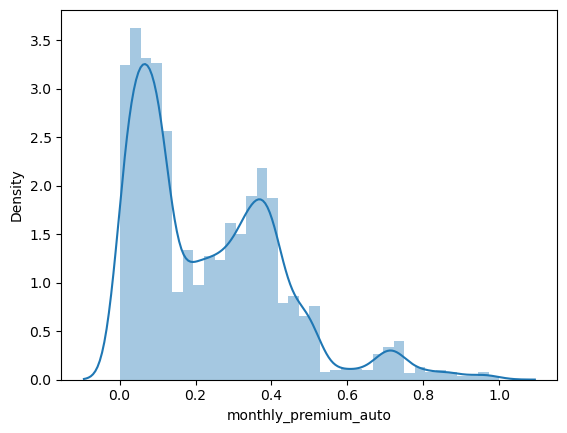

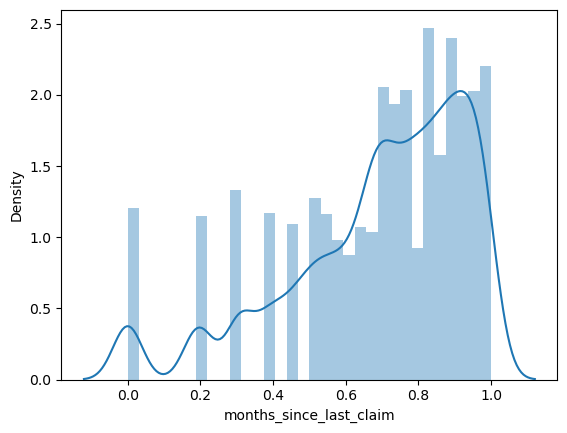

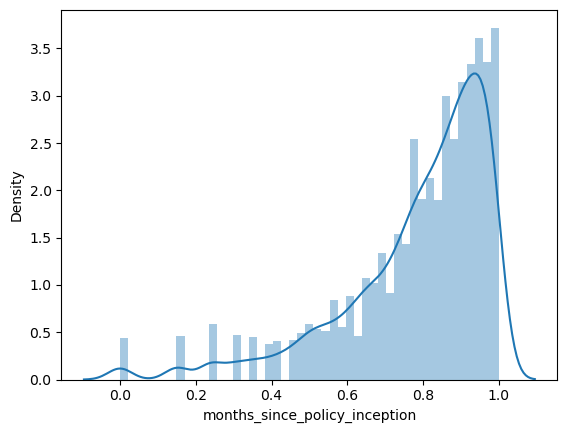

In [61]:
# With minmax
minmax_num = num_cont
transformer = MinMaxScaler().fit(minmax_num)
num_minmax = transformer.transform(minmax_num)
num_norm = pd.DataFrame(num_minmax,columns=minmax_num.columns)
num_normalized = num_norm.copy()

for column in num_normalized.columns:
    sns.distplot(num_normalized[column])
    plt.show()

<span style="color:green">  It looks pretty much the same.